<a href="https://colab.research.google.com/github/TailUFPB/Tutorials/blob/main/Pycaret/Classifica%C3%A7%C3%A3o_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a classificação com Pycaret**

Apresentação da biblioteca Pycaret com ênfase em problemas de clasificação

# **Importando as bibliotecas necessárias**

In [1]:
!pip install pycaret;
!pip install shap;

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 102kB 4.5MB/s 
     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 66.2MB 51kB/s 
     |████████████████████████████████| 148.9MB 70kB/s 
     |████████████████████████████████| 13.9MB 316kB/s 
     |████████████████████████████████| 174kB 43.0MB/s 
     |████████████████████████████████| 1.6MB 36.2MB/s 
     |████████████████████████████████| 6.8MB 34.2MB/s 
     |████████████████████████████████| 276kB 42.8MB/s 
     |████████████████████████████████| 1.8MB 37.9MB/s 
     |████████████████████████████████| 2.1MB 37.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 3.1MB 38.9MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 604kB 41.6MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 153kB 44.1MB/s 
  

In [2]:
import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **Importando os dados do problema (Dataset)**

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/hugo451/Dados/master/mushrooms.csv")
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [4]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Preprocessamento dos dados**

In [6]:
train, test = train_test_split(data, test_size=0.3, random_state=330)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5686 non-null   object
 1   cap-shape                 5686 non-null   object
 2   cap-surface               5686 non-null   object
 3   cap-color                 5686 non-null   object
 4   bruises                   5686 non-null   object
 5   odor                      5686 non-null   object
 6   gill-attachment           5686 non-null   object
 7   gill-spacing              5686 non-null   object
 8   gill-size                 5686 non-null   object
 9   gill-color                5686 non-null   object
 10  stalk-shape               5686 non-null   object
 11  stalk-root                5686 non-null   object
 12  stalk-surface-above-ring  5686 non-null   object
 13  stalk-surface-below-ring  5686 non-null   object
 14  stalk-color-above-ring  

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     2438 non-null   object
 1   cap-shape                 2438 non-null   object
 2   cap-surface               2438 non-null   object
 3   cap-color                 2438 non-null   object
 4   bruises                   2438 non-null   object
 5   odor                      2438 non-null   object
 6   gill-attachment           2438 non-null   object
 7   gill-spacing              2438 non-null   object
 8   gill-size                 2438 non-null   object
 9   gill-color                2438 non-null   object
 10  stalk-shape               2438 non-null   object
 11  stalk-root                2438 non-null   object
 12  stalk-surface-above-ring  2438 non-null   object
 13  stalk-surface-below-ring  2438 non-null   object
 14  stalk-color-above-ring  

In [9]:
clf = setup(data=train,
            target="class",
            train_size=0.7,
            categorical_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                  'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                  'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                  'stalk-surface-below-ring', 'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                  'ring-type', 'spore-print-color', 'population', 'habitat'],
            silent = True)

,Description,Value
0,session_id,3081
1,Target,class
2,Target Type,Binary
3,Label Encoded,"e: 0, p: 1"
4,Original Data,"(5686, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


# **Comparando modelos de classificação**

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.493
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.590
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.069
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.297
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.569
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.921
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.122
lr,Logistic Regression,0.9997,1.0000,0.9997,0.9997,0.9997,0.9995,0.9995,0.379
dt,Decision Tree Classifier,0.9997,0.9997,0.9997,0.9997,0.9997,0.9995,0.9995,0.040
svm,SVM - Linear Kernel,0.9997,0.0000,0.9997,0.9997,0.9997,0.9995,0.9995,0.036


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Criação do modelo**

In [11]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8191,0.9012,0.8272,0.8632,0.8153,0.6434,0.6833
1,0.8166,0.9297,0.8249,0.8618,0.8126,0.6386,0.6794
2,0.8367,0.9285,0.8437,0.8708,0.8343,0.6774,0.7084
3,0.8116,0.9201,0.8201,0.8591,0.8072,0.6288,0.6717
4,0.8040,0.8900,0.8134,0.8613,0.7983,0.6147,0.6661
5,0.8492,0.9270,0.8562,0.8831,0.8471,0.7021,0.7332
6,0.8392,0.9125,0.8461,0.8723,0.8369,0.6822,0.7124
7,0.8266,0.9119,0.8344,0.8674,0.8234,0.6580,0.6951
8,0.8593,0.9455,0.8647,0.8847,0.8579,0.7212,0.7446
9,0.8417,0.9150,0.8486,0.8811,0.8388,0.6873,0.7236


# **Curva de aprendizado do modelo**

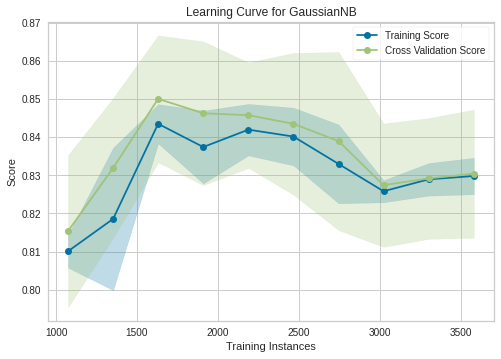

In [12]:
plot_model(estimator=nb, plot="learning")

# **Matriz de confusão**

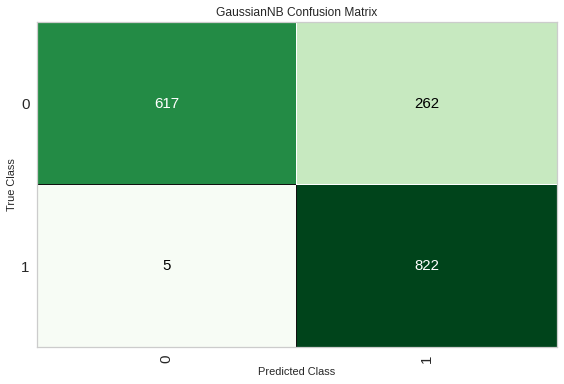

In [13]:
plot_model(estimator = nb, plot = 'confusion_matrix')

# **Curva ROC**

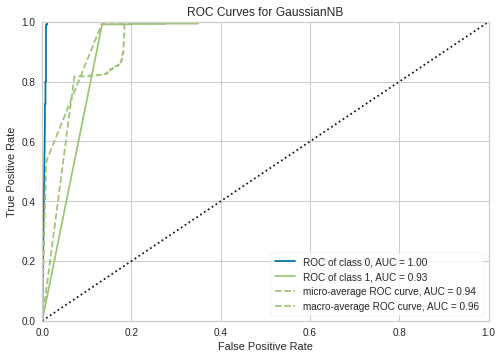

In [14]:
plot_model(estimator=nb, plot='auc')

# **Apresentação da função "evaluete_model"**

Função que apresenta os principais métodos de avaliação e reprensentação do aprendizado do modelo.

In [15]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9975,0.9974,0.9974,0.9975,0.9975,0.9950,0.9950
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [16]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Interpretação do modelo**

A importância de cada uma das features para classificação em cada uma das classes.

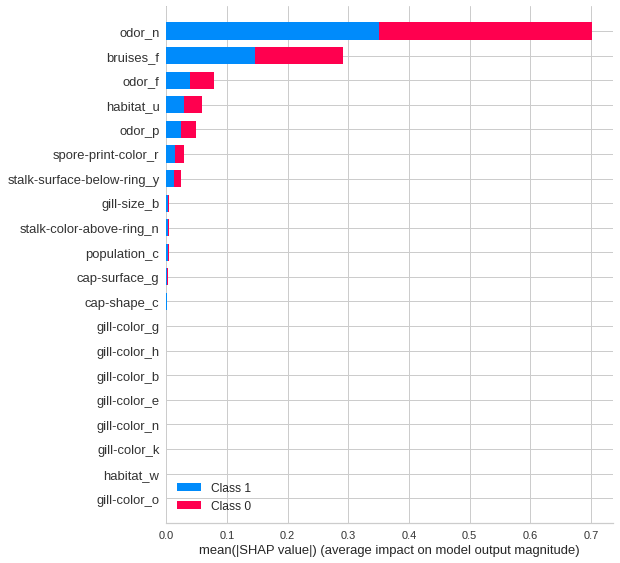

In [17]:
interpret_model(dt)

# **Predições**

Resposta do modelo em relação aos parâmetros imputados.

In [18]:
predict_model(dt, data=test)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Label,Score
0,e,x,y,w,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,k,n,m,e,1.0
1,e,f,s,n,f,n,f,w,b,n,t,e,f,s,w,w,p,w,o,e,k,a,g,e,1.0
2,e,x,y,n,t,n,f,c,b,n,t,b,s,s,g,g,p,w,o,p,k,y,d,e,1.0
3,e,b,y,w,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,k,n,g,e,1.0
4,p,k,s,n,f,y,f,c,n,b,t,?,k,k,w,p,p,w,o,e,w,v,d,p,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,e,x,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,o,c,l,e,1.0
2434,p,f,s,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u,p,1.0
2435,p,x,s,e,f,y,f,c,n,b,t,?,s,k,w,p,p,w,o,e,w,v,d,p,1.0
2436,e,x,y,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,g,e,1.0


# **Classificação Multiclasses**

Problemas de classificação caracterizado por conter mais de duas classes.

# **Importando dados**

In [19]:
from pycaret.datasets import get_data
data1 = get_data('satellite')

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,106,83,76,99,108,85,76,103,118,88,80,107,118,88,79,107,109,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,106,87,76,103,118,88,80,107,118,88,80,112,118,88,79,107,109,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,102,76,80,107,113,85,80,95,100,78,80,95,100,78,79,103,104,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,102,76,80,95,100,78,80,95,100,78,80,91,100,78,79,95,100,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,94,76,80,95,100,78,80,91,100,78,80,91,100,74,79,95,96,75,79,95,100,75,75,95,100,79,4


In [20]:
data1.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Class'],
      dtype='object')

In [21]:
clfm = setup(data=data1,
             target="Class",
             train_size=0.7,
             numeric_features=['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
                              'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
                              'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
                              'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
                              'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
                              'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
                              'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
                              'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
                              'Attribute35', 'Attribute36'])

,Description,Value
0,session_id,1001
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original Data,"(6435, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9170,0.9925,0.8950,0.9162,0.9151,0.8973,0.8978,23.393
lightgbm,Light Gradient Boosting Machine,0.9167,0.9913,0.8969,0.9162,0.9155,0.8971,0.8974,1.140
rf,Random Forest Classifier,0.9127,0.9908,0.8897,0.9116,0.9108,0.8921,0.8925,1.129
et,Extra Trees Classifier,0.9125,0.9916,0.8881,0.9114,0.9103,0.8917,0.8923,0.721
xgboost,Extreme Gradient Boosting,0.9114,0.9912,0.8923,0.9109,0.9102,0.8906,0.8910,4.192
gbc,Gradient Boosting Classifier,0.9025,0.9897,0.8813,0.9021,0.9014,0.8796,0.8799,8.817
knn,K Neighbors Classifier,0.9014,0.9826,0.8835,0.9022,0.9011,0.8783,0.8786,0.157
qda,Quadratic Discriminant Analysis,0.8528,0.9710,0.8037,0.8395,0.8347,0.8171,0.8201,0.035
dt,Decision Tree Classifier,0.8479,0.9084,0.8262,0.8506,0.8483,0.8126,0.8130,0.075
lda,Linear Discriminant Analysis,0.8424,0.9771,0.7888,0.8389,0.8365,0.8040,0.8057,0.047


In [23]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9135,0.9927,0.8847,0.9123,0.9103,0.8928,0.8936
1,0.9202,0.9910,0.9063,0.9204,0.9198,0.9017,0.9019
2,0.9290,0.9919,0.9090,0.9289,0.9283,0.9123,0.9126
3,0.9113,0.9910,0.8925,0.9105,0.9097,0.8905,0.8909
4,0.9400,0.9951,0.9304,0.9403,0.9399,0.9260,0.9261
5,0.9067,0.9905,0.8859,0.9045,0.9043,0.8847,0.8851
6,0.9244,0.9912,0.9127,0.9242,0.9242,0.9067,0.9068
7,0.9000,0.9907,0.8798,0.9024,0.9009,0.8766,0.8767
8,0.9111,0.9907,0.8897,0.9095,0.9095,0.8901,0.8904
9,0.9111,0.9879,0.8785,0.9087,0.9081,0.8898,0.8905


In [24]:
evaluate_model(estimator=model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…